<a href="https://colab.research.google.com/github/sabbirahmed345/Python-Projects-/blob/master/ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step


In [3]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
# Get the shapes 
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [5]:
# Show the first image in the training dataset
x_train[0]


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

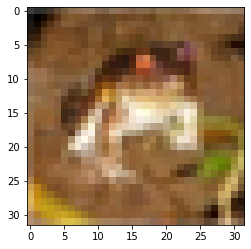

In [7]:
# Show the picture as an Image 
import matplotlib.pyplot as plt 
img = plt.imshow(x_train[0])

In [8]:
# Print the label of the image 
print('The label is:', y_train[0])

The label is: [6]


In [9]:
# Manipulating Y dataset: Convert the labels into a set of 10 numbers to input 
#into the neural network
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Print the new labels in the training dataset 
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [11]:
# Print an eample of the new labels
print('The one hot label is:', y_train_one_hot[0])

The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
# Normalize the pixels in the images to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [0]:
# Build the CNN
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Create the architecture 
model = Sequential()

# Convolution layer 
model.add(Conv2D(32, (5, 5), activation='relu', input_shape = (32, 32, 3)))

# MaxPooling layer 
model.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution layer 
model.add(Conv2D(32, (5, 5), activation='relu'))

# MaxPooling layer 
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten layer 
model.add(Flatten())

# Neural network 
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
# Compile model 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [20]:
# Train the model 
hist = model.fit(x_train, y_train_one_hot, batch_size=256, epochs=10, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 48s 1ms/step - loss: 0.6161 - acc: 0.7917 - val_loss: 0.9649 - val_acc: 0.6874
Epoch 2/10
35000/35000 [==============================] - 48s 1ms/step - loss: 0.5062 - acc: 0.8277 - val_loss: 0.9685 - val_acc: 0.6837
Epoch 3/10
35000/35000 [==============================] - 48s 1ms/step - loss: 0.4594 - acc: 0.8441 - val_loss: 0.9844 - val_acc: 0.6895
Epoch 4/10
35000/35000 [==============================] - 48s 1ms/step - loss: 0.3990 - acc: 0.8662 - val_loss: 0.9757 - val_acc: 0.6995
Epoch 5/10
35000/35000 [==============================] - 48s 1ms/step - loss: 0.3488 - acc: 0.8841 - val_loss: 1.0654 - val_acc: 0.6845
Epoch 6/10
35000/35000 [==============================] - 48s 1ms/step - loss: 0.2898 - acc: 0.9068 - val_loss: 1.1077 - val_acc: 0.6875
Epoch 7/10
35000/35000 [==============================] - 48s 1ms/step - loss: 0.2401 - acc: 0.9239 - val_loss: 1.1418 - val_acc

In [21]:
# Get the models accuracy
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 4s 413us/step


0.6805999875068665

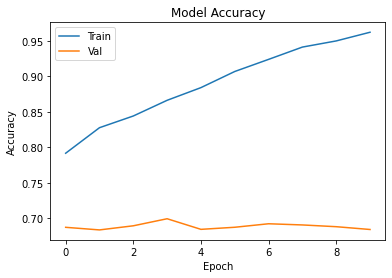

In [24]:
# Visualize the models accuracy 
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

The plot seems to be out of foucus, but when ran in PyCharm it shows just what it is expected to show. Same happens for the next plot of 'Loss'. 

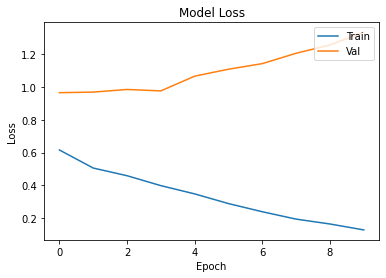

In [26]:
# Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [30]:
# Load the image data 
from google.colab import files
uploaded = files.upload()
my_image = plt.imread('Cat_1a.jpg')

Saving Cat_1a.jpg to Cat_1a.jpg


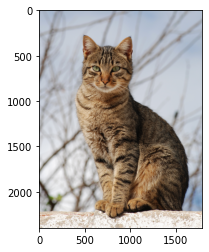

In [31]:
# Show the uploaded image 
img = plt.imshow(my_image)

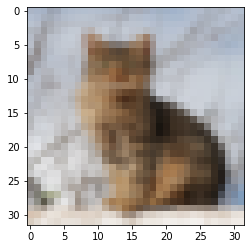

In [32]:
# Resize the image 
from skimage.transform import resize 
my_image_resized = resize(my_image, (32, 32, 3))
img = plt.imshow(my_image_resized)

In [0]:
# Get the probabilities for each class 
import numpy as np 
probabilities = model.predict(np.array([my_image_resized, ]))

In [35]:
# Print the probabilities 
probabilities 

array([[5.0414705e-08, 6.3092191e-11, 6.2594411e-04, 9.8954111e-01,
        1.8634160e-05, 6.5532601e-03, 2.8051852e-04, 2.9801370e-03,
        1.1580037e-07, 2.0031976e-07]], dtype=float32)

In [37]:
# Number to Class 
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0, :])
print('Most likely class:', number_to_class[index[9]], '--probability:', probabilities[0, index[9]]*100, '%')

Most likely class: cat --probability: 98.95411133766174 %


In [0]:
 # Save the model 
 model.save('my_model.h5')


In [0]:
 # Load the model 
 from keras.models import load_model 
 model = load_model('my_model.h5')